In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [17]:
df_tarin = pd.read_csv("Cleaned_Train.csv")
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0.0,3.0,0,22.0,1.0,0.0,7.2500,False,True
1,1.0,1.0,1,38.0,1.0,0.0,71.2833,False,False
2,1.0,3.0,1,26.0,0.0,0.0,7.9250,False,True
3,1.0,1.0,1,35.0,1.0,0.0,53.1000,False,True
4,0.0,3.0,0,35.0,0.0,0.0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,0,27.0,0.0,0.0,13.0000,False,True
887,1.0,1.0,1,19.0,0.0,0.0,30.0000,False,True
888,0.0,3.0,1,28.0,1.0,2.0,23.4500,False,True
889,1.0,1.0,0,26.0,0.0,0.0,30.0000,False,False


In [18]:
df_test = pd.read_csv("Cleaned_Train.csv")
df_test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S
1,1.0,1.0,female,38.0,1.0,0.0,71.2833,C
2,1.0,3.0,female,26.0,0.0,0.0,7.9250,S
3,1.0,1.0,female,35.0,1.0,0.0,53.1000,S
4,0.0,3.0,male,35.0,0.0,0.0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0.0,2.0,male,27.0,0.0,0.0,13.0000,S
887,1.0,1.0,female,19.0,0.0,0.0,30.0000,S
888,0.0,3.0,female,28.0,1.0,2.0,23.4500,S
889,1.0,1.0,male,26.0,0.0,0.0,30.0000,C


### Creating the model with grid search for finding the best parameters and using them

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Best parameters found:  {'C': 0.1, 'max_iter': 100, 'solver': 'saga'}
Cross-validation accuracy scores: [0.82517483 0.8041958  0.78873239 0.73943662 0.81690141]
Mean accuracy: 0.7948882103811682

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       105
         1.0       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



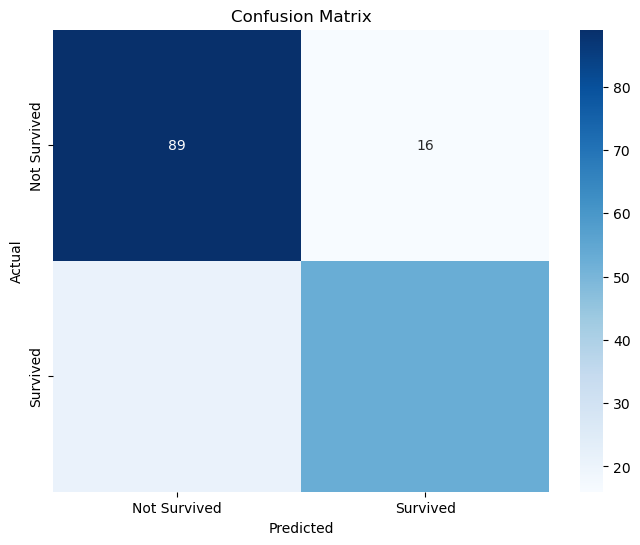

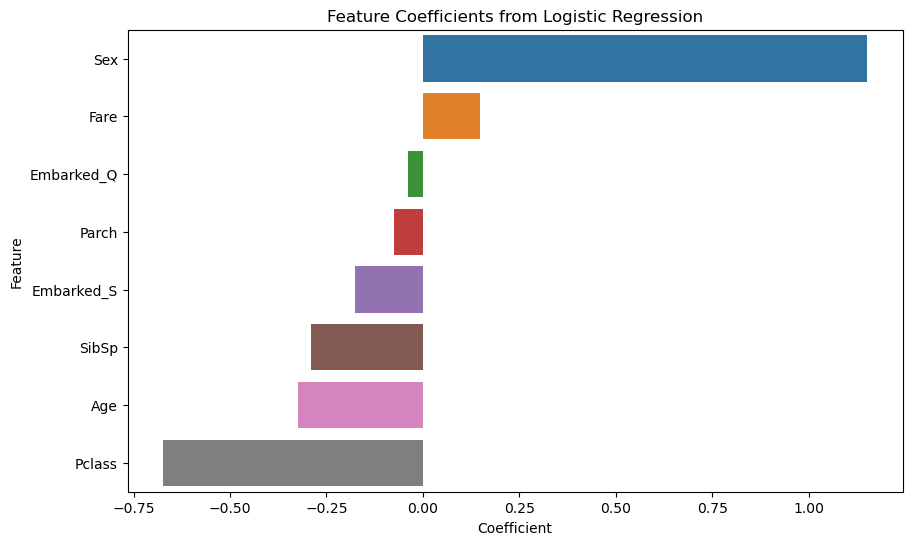

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the datasets
df_train = pd.read_csv("Cleaned_Train.csv")
df_test = pd.read_csv("Cleaned_Test.csv")

# Check for missing values
print(df_train.isnull().sum())

# Handle missing values: Fill missing 'Age' with median and 'Embarked' with mode
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

# Encode categorical features ('Sex' and 'Embarked')
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_train = pd.get_dummies(df_train, columns=['Embarked'], drop_first=True)

# Define features and target variable
X = df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]
y = df_train['Survived']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Perform Grid Search for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers to test
    'max_iter': [100, 200, 300]  # Number of iterations
}

log_reg = LogisticRegression()

grid_search = GridSearchCV(log_reg, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Perform cross-validation to evaluate the model's performance
cross_val_scores = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy scores: {cross_val_scores}")
print(f"Mean accuracy: {cross_val_scores.mean()}")

# Train Logistic Regression with the best parameters
best_log_reg = grid_search.best_estimator_

# Predict on the validation set
y_pred = best_log_reg.predict(X_val_scaled)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize the coefficient values from the logistic regression model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_log_reg.coef_[0]
})

# Sort by coefficient value
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Coefficients from Logistic Regression')
plt.show()

## Prediction 

In [20]:
example_1 = pd.DataFrame({
    'Pclass': [2],
    'Sex': [0],  # Male
    'Age': [30],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [20],
    'Embarked_Q': [0],  # Embarked at 'C'
    'Embarked_S': [0]   # Embarked at 'C'
})
example_1_scaled = scaler.transform(example_1)
prediction_1 = best_log_reg.predict(example_1_scaled)
print("Prediction for Example 1 (Male, 2nd Class, Age 30): ", "Survived" if prediction_1[0] == 1 else "Not Survived")

Prediction for Example 1 (Male, 2nd Class, Age 30):  Not Survived


In [21]:
example_2 = pd.DataFrame({
    'Pclass': [1],
    'Sex': [1],  # Female
    'Age': [25],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [100],
    'Embarked_Q': [0],  # Embarked at 'S'
    'Embarked_S': [1]   # Embarked at 'S'
})
example_2_scaled = scaler.transform(example_2)
prediction_2 = best_log_reg.predict(example_2_scaled)
print("Prediction for Example 2 (Female, 1st Class, Age 25): ", "Survived" if prediction_2[0] == 1 else "Not Survived")

Prediction for Example 2 (Female, 1st Class, Age 25):  Survived
